In [31]:
import matplotlib.pyplot as plt

# Open file
results_without_cold = {}
results_with_cold = {}

with open('results/results_transfer_without_cold.txt', 'r') as f:
    for line in f:
        line = line.replace(':', '').split(' ')
        results_without_cold[(int(line[0]), float(line[1]))] = float(line[2][:-1])/100, float(line[3])

with open('results/results_transfer_with_cold.txt', 'r') as f:
    for line in f:
        line = line.replace(':', '').split(' ')
        results_with_cold[(int(line[0]), float(line[1]))] = float(line[2][:-1])/100, float(line[3])

In [45]:
# Results: k_value, semantic_weight: corr, mae
# Plot mean Corr for each K

def plot_corr(results, label='Mean Correlation for each K Value'):
    corrs = []
    for k in range(1, 11):
        corr = 0
        for sw in (0, 0.2, 0.4, 0.6, 0.8, 1):
            corr += results[(k, sw)][0]
        corr /= 6
        corrs.append(corr)

    plt.plot(range(1, 11), corrs, label=label)

    plt.ylabel('Mean Correlation')
    plt.xlabel('K Value')
    plt.legend()
    plt.title('Mean Correlation for each K Value')
    plt.yticks([0.8, 0.85, 0.9, 0.95], ['80%', '85%', '90%', '95%'])

def plot_mae(results, label='Mean MAE for each K Value'):
    maes = []
    for k in range(1, 11):
        mae = 0
        for sw in (0, 0.2, 0.4, 0.6, 0.8, 1):
            mae += results[(k, sw)][1]
        mae /= 6
        maes.append(mae)

    plt.plot(range(1, 11), maes, label=label)

    plt.ylabel('Mean MAE')
    plt.xlabel('K Value')
    plt.legend()
    plt.title('Mean MAE for each K Value')

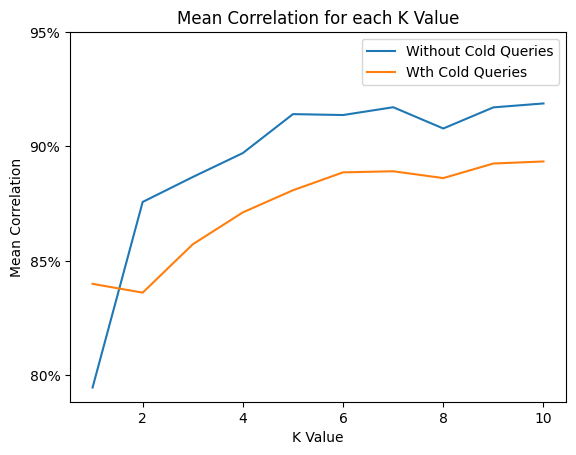

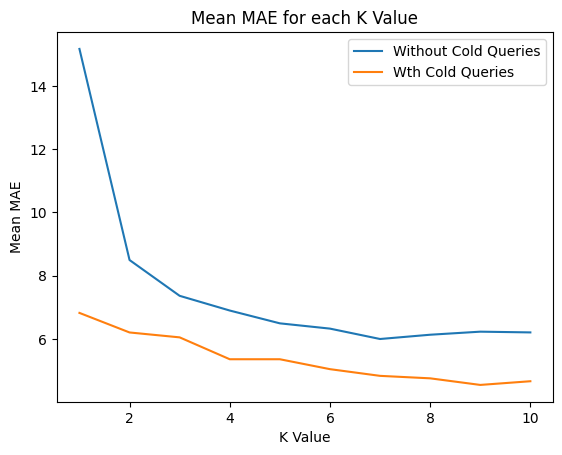

In [46]:
plot_corr(results_without_cold, label='Without Cold Queries')
plot_corr(results_with_cold , label='Wth Cold Queries')
plt.show()

plot_mae(results_without_cold, label='Without Cold Queries')
plot_mae(results_with_cold , label='Wth Cold Queries')
plt.show()

In [47]:
# Plot mean Corr for each Semantic Weight

def plot_corr_sw(results, label='Mean Correlation for each Semantic Weight'):
    corrs = []
    for sw in (0, 0.2, 0.4, 0.6, 0.8, 1):
        corr = 0
        for k in range(1, 11):
            corr += results[(k, sw)][0]
        corr /= 10
        corrs.append(corr)

    plt.plot([0, 0.2, 0.4, 0.6, 0.8, 1], corrs, label=label)

    plt.ylabel('Mean Correlation')
    plt.xlabel('Semantic Weight')
    plt.legend()
    plt.title('Mean Correlation for each Semantic Weight')
    plt.yticks([0.8, 0.85, 0.9, 0.95], ['80%', '85%', '90%', '95%'])

def plot_mae_sw(results, label='Mean MAE for each Semantic Weight'):
    maes = []
    for sw in (0, 0.2, 0.4, 0.6, 0.8, 1):
        mae = 0
        for k in range(1, 11):
            mae += results[(k, sw)][1]
        mae /= 10
        maes.append(mae)

    plt.plot([0, 0.2, 0.4, 0.6, 0.8, 1], maes, label=label)

    plt.ylabel('Mean MAE')
    plt.xlabel('Semantic Weight')
    plt.legend()
    plt.title('Mean MAE for each Semantic Weight')

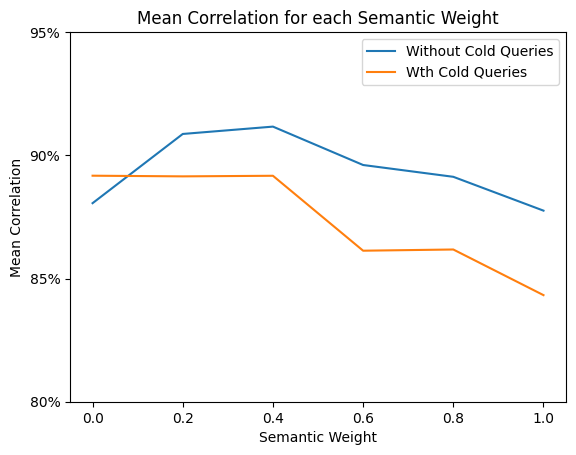

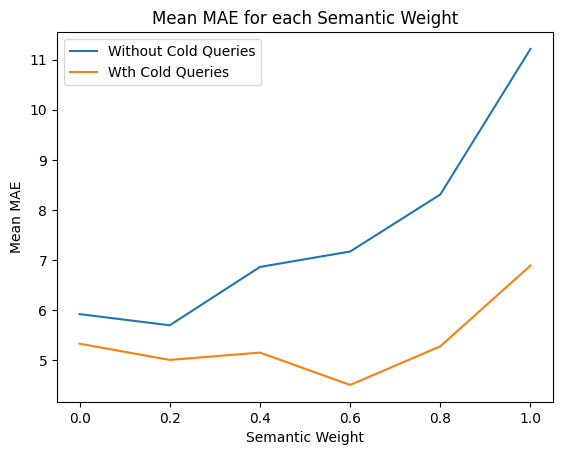

In [48]:
plot_corr_sw(results_without_cold, label='Without Cold Queries')
plot_corr_sw(results_with_cold , label='Wth Cold Queries')
plt.show()

plot_mae_sw(results_without_cold, label='Without Cold Queries')
plot_mae_sw(results_with_cold , label='Wth Cold Queries')
plt.show()

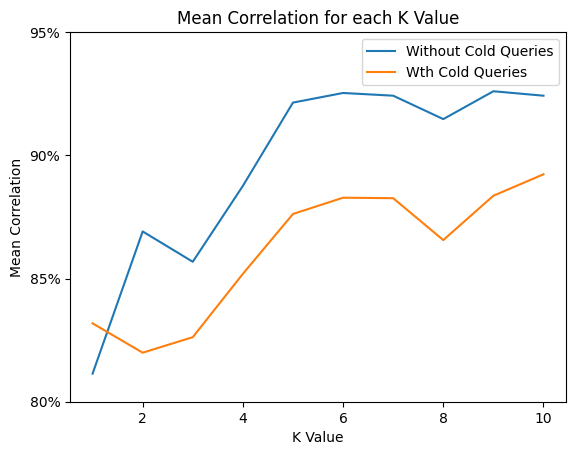

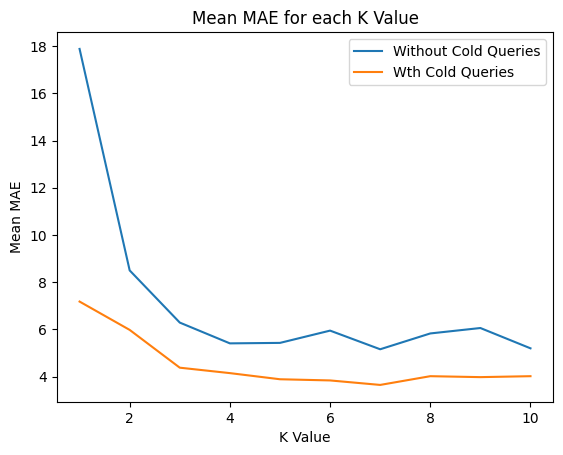

In [54]:
# Plot results for sw = 0.6

def plot_corr_k(results, sw, label='Mean Correlation for each K Value'):
    corrs = []
    for k in range(1, 11):
        corrs.append(results[(k, sw)][0])

    plt.plot(range(1, 11), corrs, label=label)

    plt.ylabel('Mean Correlation')
    plt.xlabel('K Value')
    plt.legend()
    plt.title('Mean Correlation for each K Value')
    plt.yticks([0.8, 0.85, 0.9, 0.95], ['80%', '85%', '90%', '95%'])

def plot_mae_k(results, sw, label='Mean MAE for each K Value'):
    maes = []
    for k in range(1, 11):
        maes.append(results[(k, sw)][1])

    plt.plot(range(1, 11), maes, label=label)

    plt.ylabel('Mean MAE')
    plt.xlabel('K Value')
    plt.legend()
    plt.title('Mean MAE for each K Value')

plot_corr_k(results_without_cold, 0.6, label='Without Cold Queries')
plot_corr_k(results_with_cold , 0.6, label='Wth Cold Queries')
plt.show()

plot_mae_k(results_without_cold, 0.6, label='Without Cold Queries')
plot_mae_k(results_with_cold , 0.6, label='Wth Cold Queries')
plt.show()

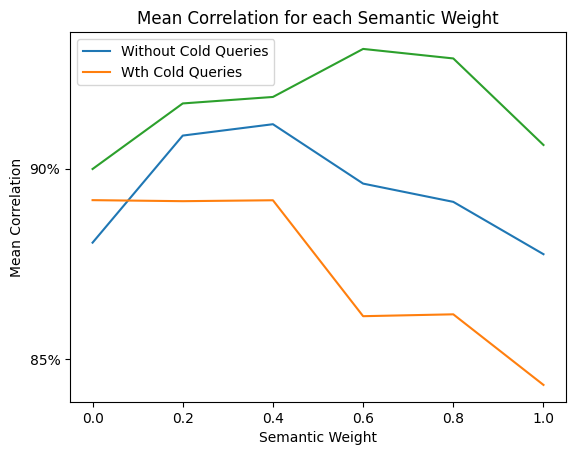

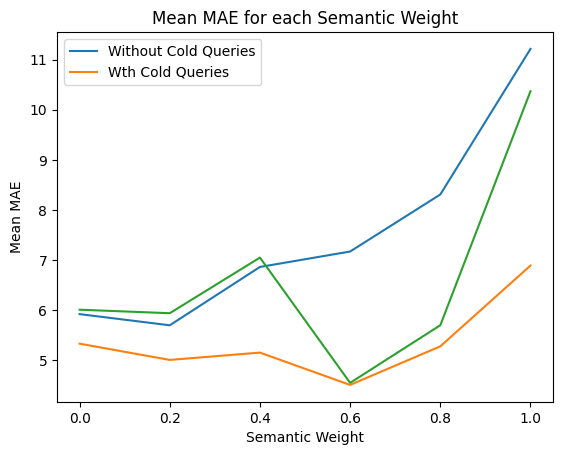

In [62]:
# Plot variable experiment results

results_variable = {}
with open('results/results_transfer_variable.txt', 'r') as f:
    for line in f:
        line = line.replace(':', '').split(' ')
        results_variable[float(line[0])] = float(line[1][:-1])/100, float(line[2])

# Plot Corr and MAE for each semantic weight
corrs = []
maes = []
for sw in (0, 0.2, 0.4, 0.6, 0.8, 1):
    corrs.append(results_variable[sw][0])
    maes.append(results_variable[sw][1])

plot_corr_sw(results_without_cold, label='Without Cold Queries')
plot_corr_sw(results_with_cold , label='Wth Cold Queries')
plt.plot([0, 0.2, 0.4, 0.6, 0.8, 1], corrs, label='Variable K, without cold queries')
plt.show()

plot_mae_sw(results_without_cold, label='Without Cold Queries')
plot_mae_sw(results_with_cold , label='Wth Cold Queries')
plt.plot([0, 0.2, 0.4, 0.6, 0.8, 1], maes, label='Variable K, without cold queries')
plt.show()